# Matplotlib Tutorial: 4. Labeling and Annotation

An important part of making readable plots is labeling and annotating
the axes.  We've already seen some of this with the ``set_xlabel``, ``set_ylabel``,
and ``set_title`` commands.  In this section we will cover text and annotation
using the ``text`` and ``annotate`` commands, and we will cover the fine-tuning
of axis tick labels using ``Formatter`` and ``Locator`` instances.

Again, we'll enter matplotlib inline mode & do some imports

In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt

## Adding Text

Text can be added to the axes in several ways.  The easiest way is to use the
``text`` command. Here's a basic version of the command:

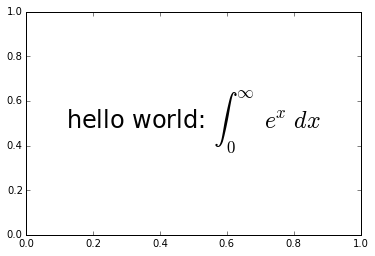

In [2]:
fig, ax = plt.subplots()

ax.text(0.5, 0.5, 'hello world: $\int_0^\infty e^x dx$', size=24, ha='center', va='center');

The above command places the text using data coordinates: that is,
as we change the ``x`` and ``y`` limits the text will move around
the axes.  It is also possible to place text at a static location
on the figure.  The locations are between 0 and 1, from the bottom-left
of the figure to the top-right:

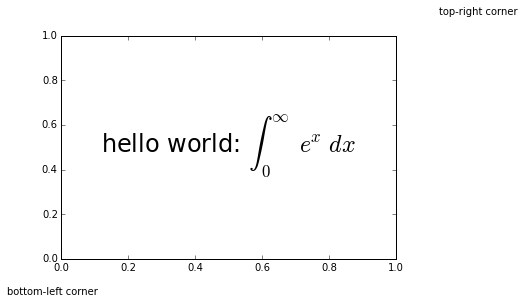

In [3]:
fig.text(0, 0, 'bottom-left corner')
fig.text(1, 1, 'top-right corner', ha='left', va='top')
fig

It is also possible to place text relative to the *axes* coordinates,
but this is easier with the ``annotate`` command rather than the ``text``
command:

/Users/jakevdp/anaconda/envs/py3k/lib/python3.3/site-packages/matplotlib/text.py:1788: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


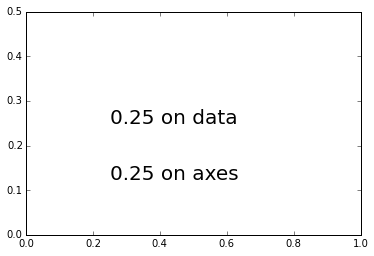

In [4]:
fig, ax = plt.subplots()

ax.annotate('0.25 on axes', (0.25, 0.25), textcoords='axes fraction', size=20)
ax.annotate('0.25 on data', (0.25, 0.25), textcoords='data', size=20)
ax.set_ylim(0, 0.5);

Annotate has some more powerful features as well: it can be used to
automatically label parts of the axes with arrows.

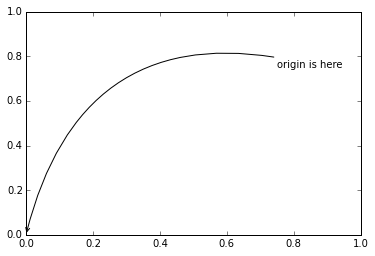

In [5]:
fig, ax = plt.subplots()

ax.annotate('origin is here', (0, 0), (0.75, 0.75),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0.5'),
            xycoords='data', textcoords='axes fraction');

There are a number of different arrow styles available: the online
documentation has a good set of examples.

## Controlling Axis Properties

Often you'd like to be able to fine-tune the tick labels
on the axis, explicitly setting where they appear, adding
minor ticks, or perhaps turning them off altogether.  This
is accomplished through the ``Formatter`` and ``Locator``
objects.

``Locator`` objects control where ticks are located.  Here
are some of the available choices:

- ``plt.MultipleLocator``: locate ticks at a multiple of some value
- ``plt.MaxNLocator``: use a maximum number of ticks for the given plot range
- ``plt.NullLocator``: do not add ticks to the plot

``Formatter`` objects control what labels are shown at the tick locations.
Some useful options are:

- ``plt.FormatStrFormatter``: use a format string (like ``'%.2g``) at each tick
- ``plt.FuncFormatter``: specify a user-defined function
- ``plt.NullFormatter``: do not label the ticks

Any of these options may be applied to either major or minor ticks, using the
functions

- ``set_major_formatter``, ``set_major_locator``
- ``set_minor_formatter``, ``set_minor_locator``

We'll see some examples below

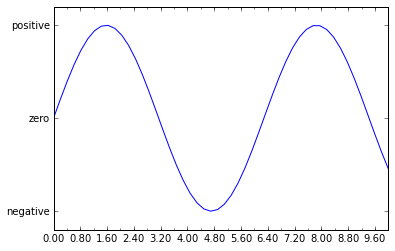

In [6]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
ax.plot(x, np.sin(x))

ax.xaxis.set_major_locator(plt.MultipleLocator(0.8))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))

ax.xaxis.set_minor_locator(plt.MultipleLocator(0.4))
ax.yaxis.set_minor_locator(plt.NullLocator())  # no ticks (default)

ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # float with two decimals


def tickformat(val, pos):
    if val > 0:
        return "positive"
    elif val < 0:
        return "negative"
    else:
        return "zero"
    
ax.yaxis.set_major_formatter(plt.FuncFormatter(tickformat))
ax.set_ylim(-1.2, 1.2);

Using these combinations (as well as other options we haven't discussed)
leads to some very flexible plots.